# 1 KNN Classifier

Analyze data white_wine.csv
- Apply KNN Method (k = 3)
- target : quality (quality >6 → Y = 1)
- features : density alcohol
- Validate the model using accuracy in 20% testing data
- Apply scaling and Validate the model using accuracy in 20% testing data
- Apply scaling Choose Factor K based on accuracy:
- K = (1, 3, 5,.., 29)






In [15]:
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np

## 1.1 Data

In [4]:
wine=pd.read_csv('white_wine.csv')

In [5]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0
...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0


In [6]:
wine['label']=np.where(wine['quality']>6,1,0)

In [7]:
wine

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,label
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6.0,0
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6.0,0
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6.0,0
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
515,6.1,0.31,0.26,2.2,0.051,28.0,167.0,0.9926,3.37,0.47,10.4,6.0,0
516,6.8,0.18,0.37,1.6,0.055,47.0,154.0,0.9934,3.08,0.45,9.1,5.0,0
517,7.4,0.15,0.42,1.7,0.045,49.0,154.0,0.9920,3.00,0.60,10.4,6.0,0
518,5.9,0.13,0.28,1.9,0.050,20.0,78.0,0.9918,3.43,0.64,10.8,6.0,0


## 1.2 EDA

<AxesSubplot:xlabel='density', ylabel='alcohol'>

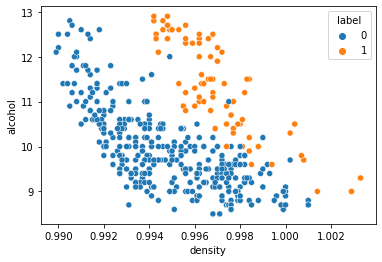

In [8]:
sns.scatterplot(data=wine,x='density', y='alcohol', hue='label')

In [9]:
wine.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      1
sulphates               1
alcohol                 1
quality                 1
label                   0
dtype: int64

In [10]:
wine['alcohol']=wine['alcohol'].fillna(wine['alcohol'].mean())

## 1.3 Splitting Data

In [11]:
x=wine[['alcohol','density']]
y=wine['label']

In [12]:
x_train, x_test, y_train, y_test = train_test_split(
    x,
    y,
    stratify=y,
    test_size=0.2,
    random_state=2020
)

## 1.4.1 without scalling

In [13]:
from sklearn.neighbors import KNeighborsClassifier

In [14]:
knn = KNeighborsClassifier(n_neighbors=3) # define model, defaultnya 5 
knn.fit(x_train, y_train) # fitting / traing
y_predict=knn.predict(x_test) # prediksi

In [16]:
print('Akurasi model KNN di dataset test adalah:', accuracy_score(y_test, y_predict))

Akurasi model KNN di dataset test adalah: 0.9038461538461539


## 1.4.2 with scalling

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
scaler=MinMaxScaler() # define transformer
scaler.fit(x_train) # fitting / training
x_train_scaled=scaler.transform(x_train)
x_test_scaled=scaler.transform(x_test)

In [20]:
x_train

,alcohol,density
325,10.5,0.9946
273,9.0,0.9949
287,9.0,1.0029
342,9.1,0.9962
323,10.4,0.9946
...,...,...
382,9.2,0.9969
426,10.4,0.9954
489,8.9,0.9962
311,12.5,0.9968


In [21]:
x_train_scaled

array([[0.45454545, 0.34586466],
       [0.11363636, 0.36842105],
       [0.11363636, 0.96992481],
       [0.13636364, 0.46616541],
       [0.43181818, 0.34586466],
       [0.15909091, 0.63909774],
       [0.56818182, 0.12781955],
       [0.34090909, 0.45112782],
       [0.09090909, 0.46616541],
       [0.52272727, 0.15037594],
       [0.09090909, 0.54135338],
       [0.29545455, 0.61654135],
       [0.43181818, 0.15037594],
       [0.20454545, 0.54135338],
       [0.45454545, 0.59398496],
       [0.09090909, 0.54135338],
       [0.45454545, 0.13533835],
       [0.45454545, 0.30075188],
       [0.22727273, 0.4887218 ],
       [0.45454545, 0.28571429],
       [0.97727273, 0.03759398],
       [0.88636364, 0.36090226],
       [0.61363636, 0.42105263],
       [0.18181818, 0.63157895],
       [0.06818182, 0.63157895],
       [0.18181818, 0.54135338],
       [0.79545455, 0.05263158],
       [0.18181818, 0.58646617],
       [0.13636364, 0.53383459],
       [0.31818182, 0.36842105],
       [0.

In [22]:
knn = KNeighborsClassifier(n_neighbors=3) # define model, defaultnya 5 
knn.fit(x_train_scaled, y_train) # fitting / traing
y_predict=knn.predict(x_test_scaled) # prediksi

In [23]:
print('Akurasi model KNN di dataset test adalah:', accuracy_score(y_test, y_predict))

Akurasi model KNN di dataset test adalah: 0.9807692307692307


> nilai akurasi meningkat dari 90% menjadi 98% setelah dilakukan scalling

## 1.5 Choosing K Factor

In [24]:
import matplotlib.pyplot as plt

In [32]:
k=range(1,30,2)
testing_score=[]
training_score=[]
score=0

for i in k:
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_scaled, y_train)
    
    y_predict_train=knn.predict(x_train_scaled)
    training_score.append(accuracy_score(y_train,y_predict_train))
    
    y_predict_test=knn.predict(x_test_scaled)
    acc_score=accuracy_score(y_test,y_predict_test)
    testing_score.append(acc_score)
    
    if score<acc_score:
        score=acc_score
        best_k=i

C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\ZenBook-Tiowiradin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.


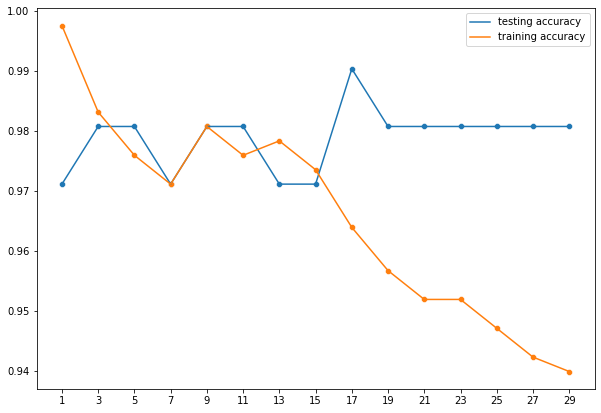

In [33]:
plt.figure(figsize=(10,7))
sns.lineplot(k,testing_score)
sns.scatterplot(k,testing_score)
sns.lineplot(k,training_score)
sns.scatterplot(k,training_score)
plt.legend(['testing accuracy','training accuracy'])
plt.xticks(list(k))
plt.show()

In [36]:
print('best k:', best_k)
print('best score:', score)

best k: 17
best score: 0.9903846153846154


>Jumlah K (n neighbors) terbaik adalah 17, akurasi meningkat dari uji sebelumnya yaitu dari 98% menjadi 99%

# 2 Decision Tree Classifier

Analyze data white_wine.csv
- Apply Decision Tree Classification Method (max_depth = 2)
- target : quality (quality > 6 → Y = 1)
- features : density alcohol
- Validate the model using accuracy in 20% testing data
- Apply scaling and Validate the model using accuracy in 20% testing data
- Check the performance: is there any difference whether we applied scaling or not ?
- Check the tree: is there any difference whether we applied scaling or not ?

## 2.1 without scalling

In [38]:
from sklearn.tree import DecisionTreeClassifier

In [49]:
tree=DecisionTreeClassifier(max_depth=2)
tree.fit(x_train,y_train)
y_predict=tree.predict(x_test)

In [50]:
print('Nilai akurasi model Decision Tree Classifier without scalling:', accuracy_score(y_test,y_predict))

Nilai akurasi model Decision Tree Classifier without scalling: 0.9519230769230769


In [41]:
from sklearn.tree import plot_tree

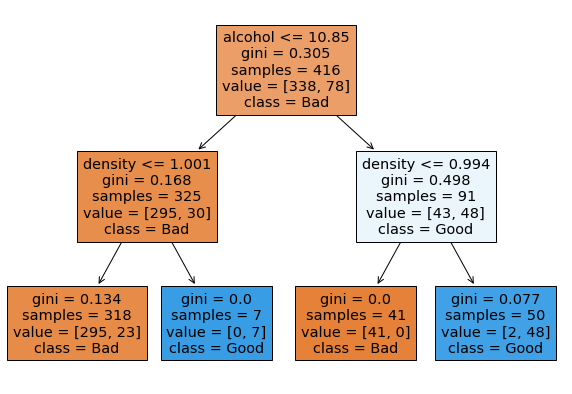

In [51]:
plt.figure(figsize=(10,7))
plot_tree(tree,feature_names=list(x), class_names=['Bad','Good'],filled=True)
plt.show()

<AxesSubplot:xlabel='density', ylabel='alcohol'>

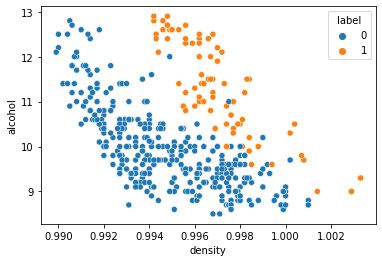

In [45]:
sns.scatterplot(data=wine,x='density', y='alcohol', hue='label')

## 2.2 with scalling

In [52]:
tree2=DecisionTreeClassifier(max_depth=2)
tree2.fit(x_train_scaled,y_train)
y_predict=tree2.predict(x_test_scaled)

In [48]:
print('Nilai akurasi model Decision Tree Classifier with scalling:', accuracy_score(y_test,y_predict))

Nilai akurasi model Decision Tree Classifier with scalling: 0.9519230769230769


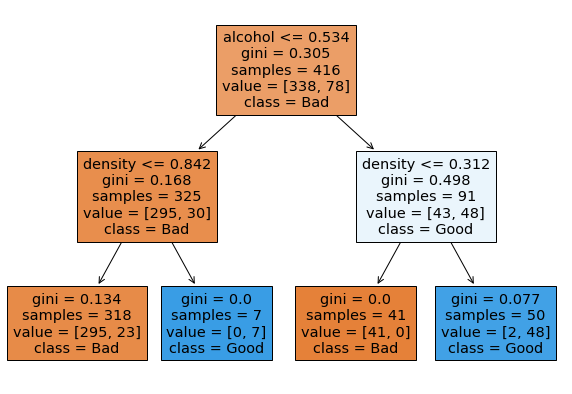

In [53]:
plt.figure(figsize=(10,7))
plot_tree(tree2,feature_names=list(x), class_names=['Bad','Good'],filled=True)
plt.show()

>Scalling tidak memberikan pengaruh terhadap performa Decision Tree (menghasilkan nilai akurasi yg sama), tetapi dapat menyulitkan interpretasi pohon keputusan.

>Misal, di pohon pertama kita dapat mengetahui bahwa wine dengan konsentrasi alkohol di bawah 10.% dan density di bawah 1.001 akan diprediksi sebagai _bad_ wine. Di pohon keputusan kedua, angka ini menjadi angka hasil scalling yg tidak ada artinya sehingga lebih sulit dimengerti.